In [1]:
import pandas as pd
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('AllVertebrates.csv')

In [3]:
df.head()

,Internal taxon ID,Class,Order,Family,Genus,Species,Red List threat category,Population trend,Systems,Realms,Habitats list,Threats list,Threats
0,1078,ACTINOPTERYGII,PERCIFORMES,CENTRARCHIDAE,Ambloplites,cavifrons,Least Concern,Stable,Freshwater (=Inland waters),Nearctic,[{'habitat': 'Wetlands (inland) - Permanent Ri...,"[{'code': '7.2', 'score': 'Low Impact: 5', 'se...",Decline of this species is attributed to impou...
1,11060,ACTINOPTERYGII,PERCIFORMES,KUHLIIDAE,Kuhlia,marginata,Least Concern,Stable,Freshwater (=Inland waters)|Marine,Australasian|Indomalayan|Oceanian,[{'habitat': 'Wetlands (inland) - Permanent Ri...,[],There are currently no known major threats imp...
2,11150,ACTINOPTERYGII,TETRAODONTIFORMES,TETRAODONTIDAE,Lagocephalus,gloveri,Data Deficient,Decreasing,Marine,NaN,"[{'habitat': 'Marine Neritic - Estuaries', 'co...","[{'code': '1.1', 'score': 'Unknown', 'severity...",<strong>Pufferfish fishery<br/></strong><span ...
3,12137,ACTINOPTERYGII,PERCIFORMES,SPARIDAE,Lithognathus,lithognathus,Endangered,Decreasing,Marine,NaN,"[{'habitat': 'Marine Neritic - Estuaries', 'co...","[{'code': '11.2', 'score': 'Unknown', 'severit...",<em>Lithognathus lithognathus</em> is threaten...
4,12416,ACTINOPTERYGII,PERCIFORMES,LUTJANIDAE,Lutjanus,analis,Near Threatened,Decreasing,Marine,NaN,[{'habitat': 'Marine Neritic - Subtidal Rock a...,"[{'code': '1.1', 'score': 'Unknown', 'severity...",This valuable species is caught with hook and ...


In [4]:
df = df.dropna()

In [5]:
threats = df["Threats"]

In [6]:
threats[0:5]

0    Decline of this species is attributed to impou...
1    There are currently no known major threats imp...
5    <em>Lutjanus cyanopterus</em> populations that...
6    Key Silverside is threatened by habitat loss t...
7    This species is amongst New Zealand's most thr...
Name: Threats, dtype: object

In [7]:
threats_joined = " ".join(threats)

In [8]:
threats_joined[0:200]

'Decline of this species is attributed to impoundment, pollution, competition with introduced populations of rock bass (<em>A. rupestris</em>), and adverse spring stream conditions in certain years (Pe'

In [9]:
threats_split = threats_joined.split()

In [10]:
threats_split[0:20]

['Decline',
 'of',
 'this',
 'species',
 'is',
 'attributed',
 'to',
 'impoundment,',
 'pollution,',
 'competition',
 'with',
 'introduced',
 'populations',
 'of',
 'rock',
 'bass',
 '(<em>A.',
 'rupestris</em>),',
 'and',
 'adverse']

In [14]:
#Removing stop words using NLTK 
stop_words = stopwords.words('english')
threats_noSW = [word for word in threats_split if word not in stop_words]

In [18]:
#No stop words text
threats_noSW[0:25]

['Decline',
 'species',
 'attributed',
 'impoundment,',
 'pollution,',
 'competition',
 'introduced',
 'populations',
 'rock',
 'bass',
 '(<em>A.',
 'rupestris</em>),',
 'adverse',
 'spring',
 'stream',
 'conditions',
 'certain',
 'years',
 '(Petrimoulx',
 '1983).',
 'Burkhead',
 'Jenkins',
 '(1991)',
 'identified',
 'siltation']

<Figure size 432x288 with 0 Axes>

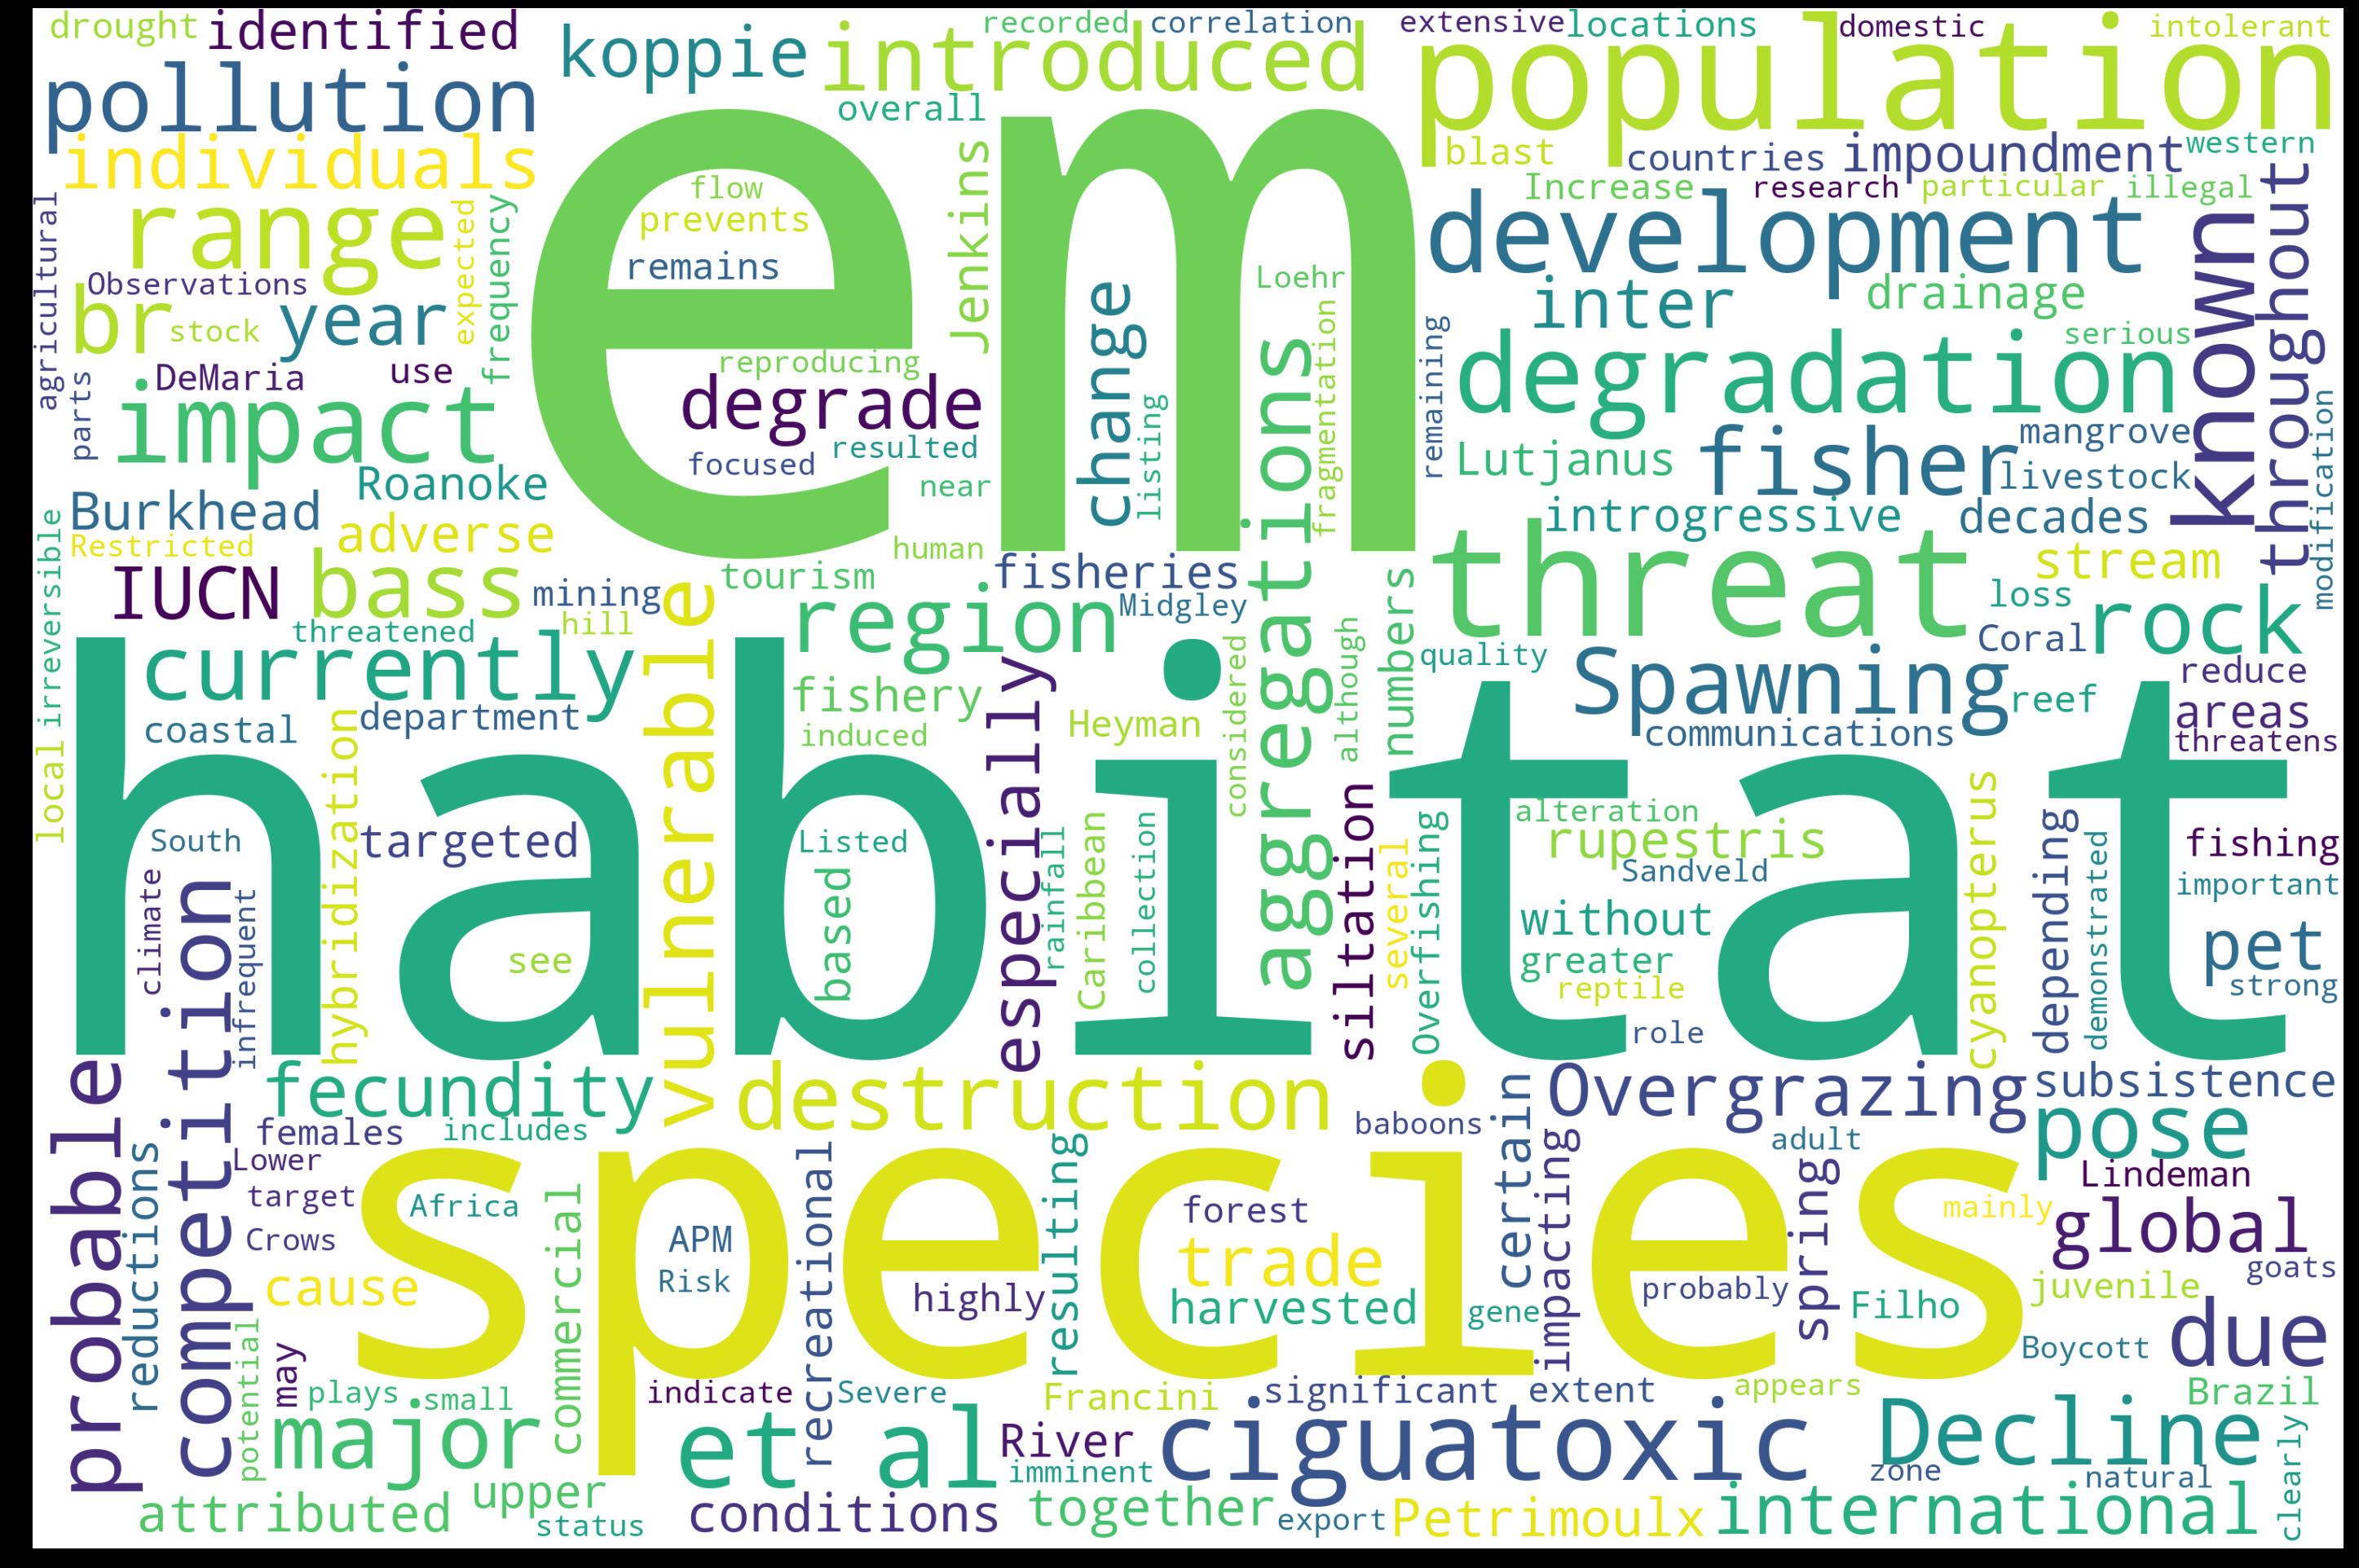

<Figure size 432x288 with 0 Axes>

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.Threats.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.figure()